# Data Import

In [12]:
#Data Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
#Load dataset
df =pd.read_csv('mer_imputed_merged_data.csv')
df.head()

,datetime,direct_radiation (W/m²),PM25_MER,PM10_MER,SO2_MER,O3_MER,NO2_MER,CO_MER,RH_MER,TMP_MER,WDR_MER,WSP_MER,is_festival,is_weekend,AirQualityIndex
0,2020-11-25 01:00:00,0,35.0,72.0,8.0,1.0,47.0,1.8,44.0,15.6,256.0,0.5,0,0,4
1,2020-11-25 02:00:00,0,43.0,73.0,7.0,1.0,43.0,1.3,47.0,15.0,296.0,0.7,0,0,4
2,2020-11-25 03:00:00,0,37.0,60.0,6.0,1.0,39.0,0.9,49.0,14.4,302.0,0.5,0,0,4
3,2020-11-25 04:00:00,0,34.0,51.0,4.0,1.0,37.0,0.4,51.0,13.6,320.0,0.7,0,0,4
4,2020-11-25 05:00:00,0,28.0,59.0,5.0,1.0,40.0,0.7,56.0,12.6,90.0,1.2,0,0,4


# 2. Understanding the data 

In [13]:
#To understand the structure of the dataset and variables available for analysis
print(df.columns)

Index(['datetime', 'direct_radiation (W/m²)', 'PM25_MER', 'PM10_MER',
       'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER', 'RH_MER', 'TMP_MER',
       'WDR_MER', 'WSP_MER', 'is_festival', 'is_weekend', 'AirQualityIndex'],
      dtype='object')


In [14]:
#To identify how many missing (null/NaN) values exist in each column of the dataset
print(df.isnull().sum())

datetime                   0
direct_radiation (W/m²)    0
PM25_MER                   0
PM10_MER                   0
SO2_MER                    0
O3_MER                     0
NO2_MER                    0
CO_MER                     0
RH_MER                     0
TMP_MER                    0
WDR_MER                    0
WSP_MER                    0
is_festival                0
is_weekend                 0
AirQualityIndex            0
dtype: int64


In [15]:
#To check data types of the columns
print(df.dtypes)

datetime                    object
direct_radiation (W/m²)      int64
PM25_MER                   float64
PM10_MER                   float64
SO2_MER                    float64
O3_MER                     float64
NO2_MER                    float64
CO_MER                     float64
RH_MER                     float64
TMP_MER                    float64
WDR_MER                    float64
WSP_MER                    float64
is_festival                  int64
is_weekend                   int64
AirQualityIndex              int64
dtype: object


# 3. Univariate Analysis
- Univariate analysis is a type of data analysis that focuses on examining one variable at a time. The goal is to summarize and understand the key characteristics of that variable. 
- In this analysis, we will focus on individual variables to understand their distribution and central tendencies. We aim to uncover patterns, identify potential outliers, and summarize the key characteristics of each variable. 

### Numerical Columns
- We will first explore the numerical variables to analyze their distribution, central tendencies, and variability, which includes all columns except the 'datetime' column.

#### Statistical Summary

In [16]:
#To calculate and display key statistical metrics/summary for columns in the dataset
summary = df.describe()
print(summary)

       direct_radiation (W/m²)      PM25_MER      PM10_MER       SO2_MER  \
count             26788.000000  26788.000000  26788.000000  26788.000000   
mean                198.299313     21.938476     39.138806      3.653750   
std                 285.059521     12.670387     20.382502      5.767726   
min                   0.000000      1.000000      2.000000      0.000000   
25%                   0.000000     13.000000     24.000000      1.000000   
50%                   2.000000     20.000000     36.000000      2.000000   
75%                 383.000000     29.000000     51.000000      4.000000   
max                1008.000000    186.000000    411.000000    251.000000   

             O3_MER       NO2_MER        CO_MER        RH_MER       TMP_MER  \
count  26788.000000  26788.000000  26788.000000  26788.000000  26788.000000   
mean      25.629505     30.601047      0.505975     49.909788     18.849627   
std       26.409113     13.298383      0.382489     19.936643      4.285339   

#### Visualizations for Numerical Data

##### 1. Histogram
- A histogram is a graphical representation of the distribution of a dataset. It displays the frequency (or count) of data points within specific intervals, called bins

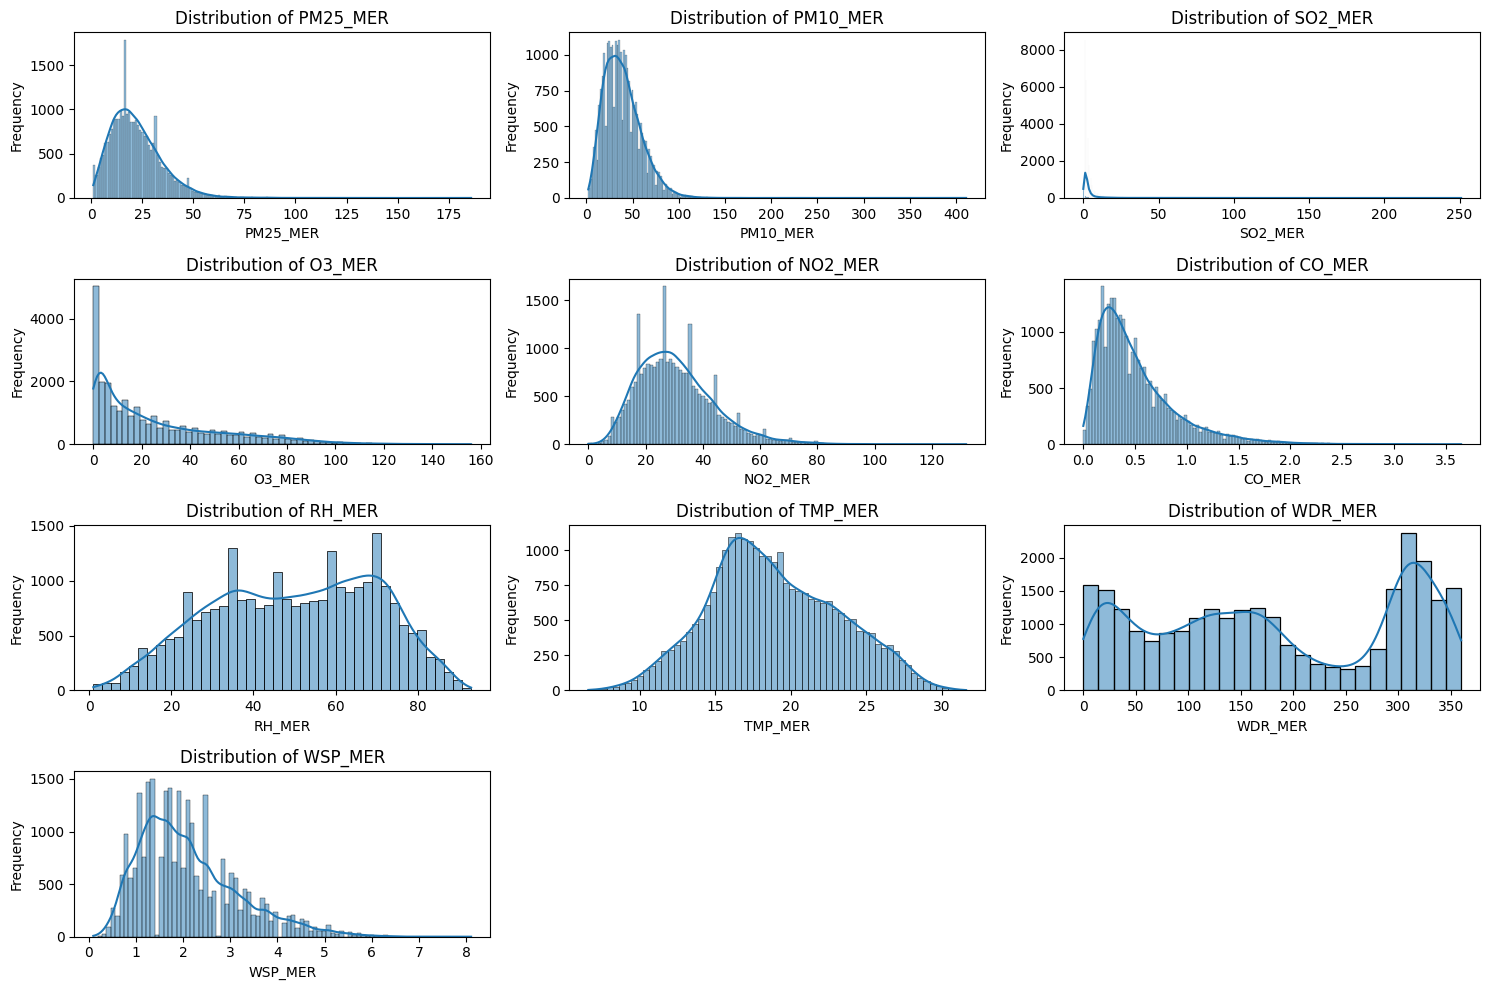

In [17]:
# Select pollutant and meteorological columns for the histogram
pollutant_columns = ['PM25_MER', 'PM10_MER', 'SO2_MER', 'O3_MER', 'NO2_MER', 'CO_MER']
meteorological_columns = ['RH_MER', 'TMP_MER', 'WDR_MER', 'WSP_MER']
columns_to_plot = pollutant_columns + meteorological_columns

# Create the histograms
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(4, 3, i + 1)  # Adjust the subplot grid as needed
    sns.histplot(df[col], kde=True)  # Use kde=True for density curve
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

##### 2. Box Plots
- A boxplot (or box-and-whisker plot) is a graphical representation that displays the distribution of a dataset based on five key summary statistics: the minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It also highlights potential outliers as points outside the "whiskers."

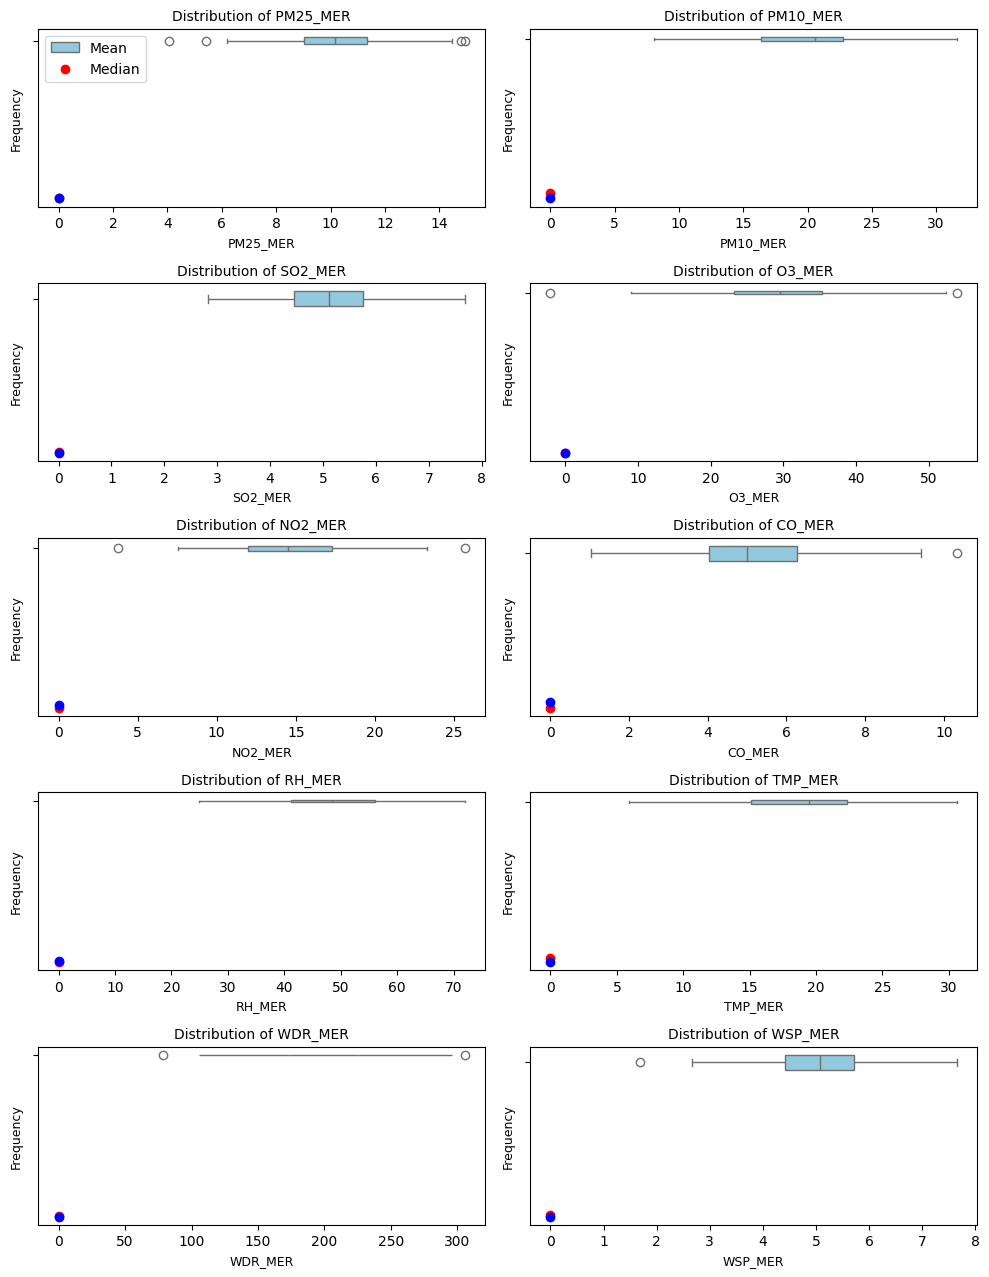

In [22]:
# fig, axes = plt.subplots(6, 2, figsize=(10, 15))  # 4 rows, 3 columns grid
# axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# for i, col in enumerate(columns_to_plot):
#  #Set up the figure and axes

#     sns.boxplot(x=df[col], ax=axes[i],color='skyblue', width=0.5)
#     # Add title and labels
#     axes[i].set_title(f'Distribution of {col}', fontsize=10)
#     axes[i].set_xlabel(col, fontsize=9)
#     axes[i].set_ylabel('Frequency', fontsize=9)
    
# # Remove any empty subplots (if columns_to_plot is fewer than grid spaces)
# for j in range(len(columns_to_plot), len(axes)):
#     fig.delaxes(axes[j])
    
# # Show the plot
# plt.tight_layout()
# plt.show()
np.random.seed(10)
df = pd.DataFrame({
    'direct_radiation (W/m²)': np.random.normal(1000, 200, 100),
    'PM25_MER': np.random.normal(10, 2, 100),
    'PM10_MER': np.random.normal(20, 5, 100),
    'SO2_MER': np.random.normal(5, 1, 100),
    'O3_MER': np.random.normal(30, 10, 100),
    'NO2_MER': np.random.normal(15, 4, 100),
    'CO_MER': np.random.normal(5, 2, 100),
    'RH_MER': np.random.normal(50, 10, 100),
    'TMP_MER': np.random.normal(20, 5, 100),
    'WDR_MER': np.random.normal(200, 50, 100),
    'WSP_MER': np.random.normal(5, 1, 100),
    # 'is_festival': np.random.randint(0, 2, 100),
    # 'is_weekend': np.random.randint(0, 2, 100),
    # 'AirQualityIndex': np.random.normal(100, 20, 100)
})
# Set up the figure and axes
fig, axes = plt.subplots(6, 2, figsize=(10, 15))  # 6 rows, 2 columns grid
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(columns_to_plot):
    # Plot the boxplot
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue', width=0.5)

    # Calculate mean and median
    mean_value = df[col].mean()
    median_value = df[col].median()

    # Add title and labels
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Frequency', fontsize=9)

    # Add markers for mean and median
    axes[i].scatter([0], [mean_value], color='red', zorder=10)  # Red marker for mean
    axes[i].scatter([0], [median_value], color='blue', zorder=10)  # Blue marker for median
    
    # Optional: Add legend only once
    if i == 0:
        axes[i].legend(['Mean', 'Median'])

# Remove any empty subplots (if columns_to_plot is fewer than grid spaces)
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Show the plot
plt.tight_layout()
plt.show()

**3. Violin Plots**
- A violin plot is used to visualize the distribution and density of each variable, highlighting the shape of the data's distribution and potential multi-modality.


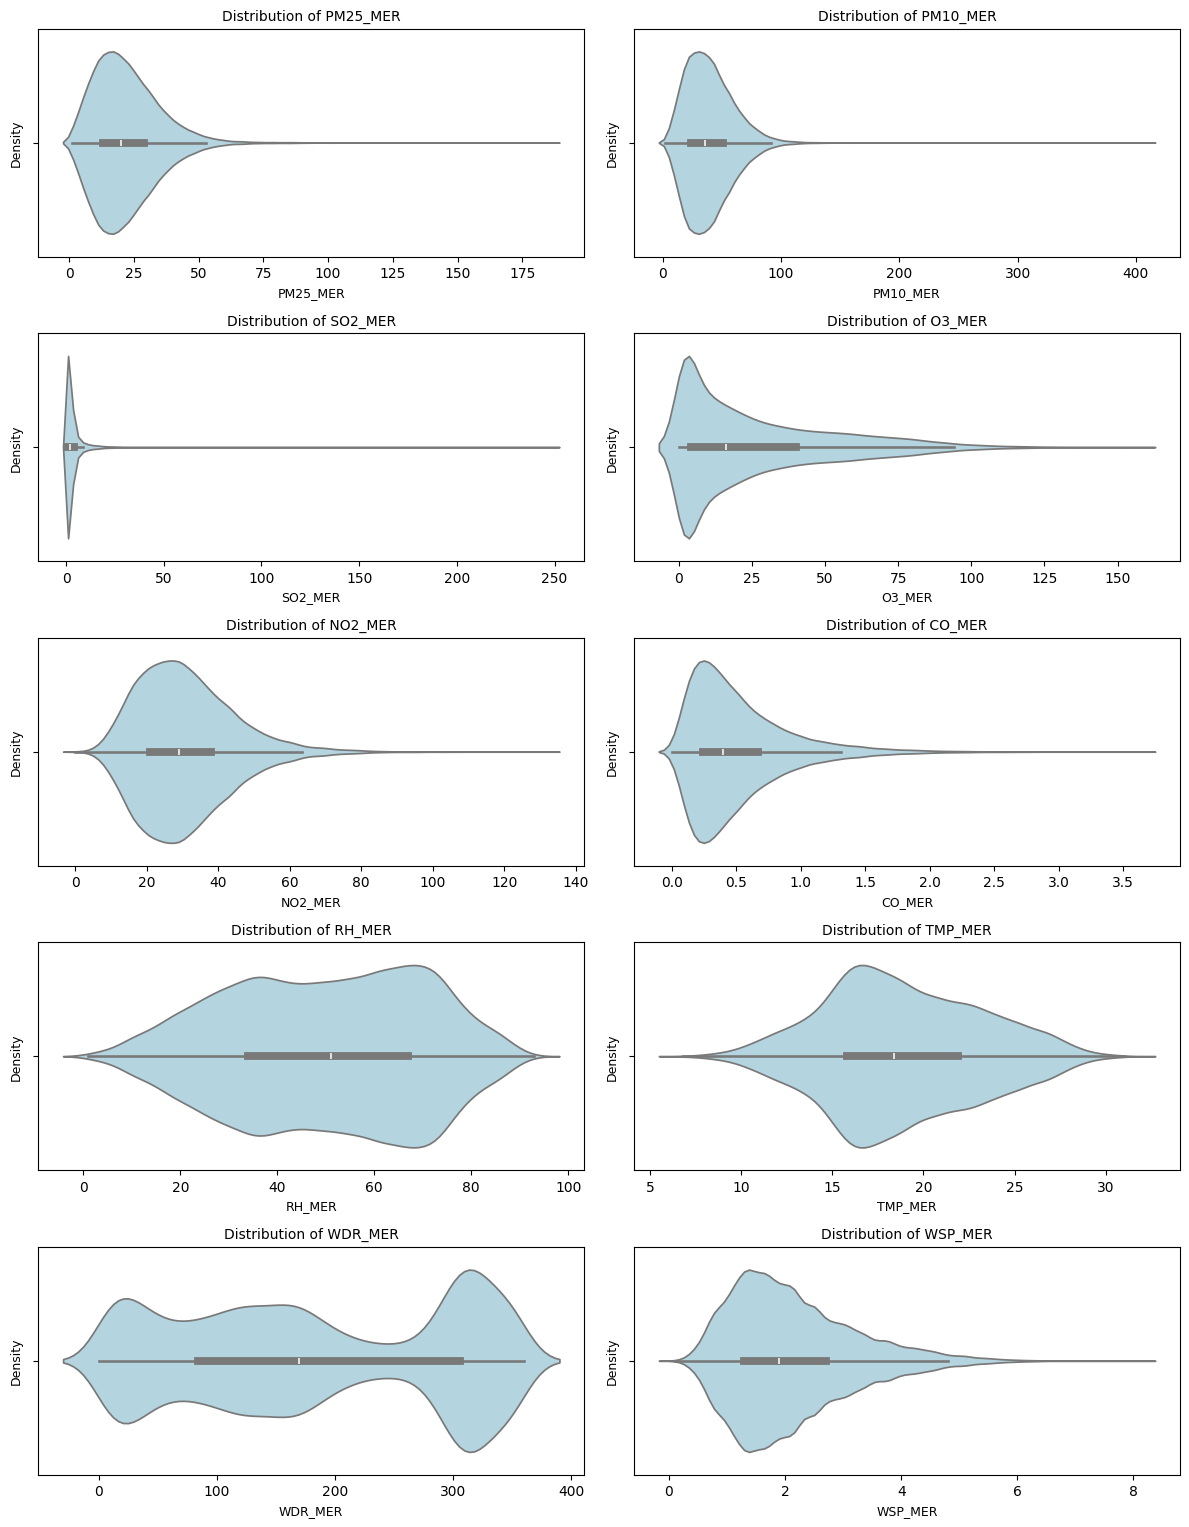

In [19]:
fig, axes = plt.subplots(6, 2, figsize=(12, 18))  # 6 rows, 2 columns grid
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each column and corresponding subplot
for i, col in enumerate(columns_to_plot):
    sns.violinplot(x=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Density', fontsize=9)

# Remove any unused subplots if the number of columns is less than grid spaces
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


**4. Bar Plots**
- A bar plot is used to summarize the mean (or other statistics) of the air quality metrics, providing a clear and direct comparison between different variables.


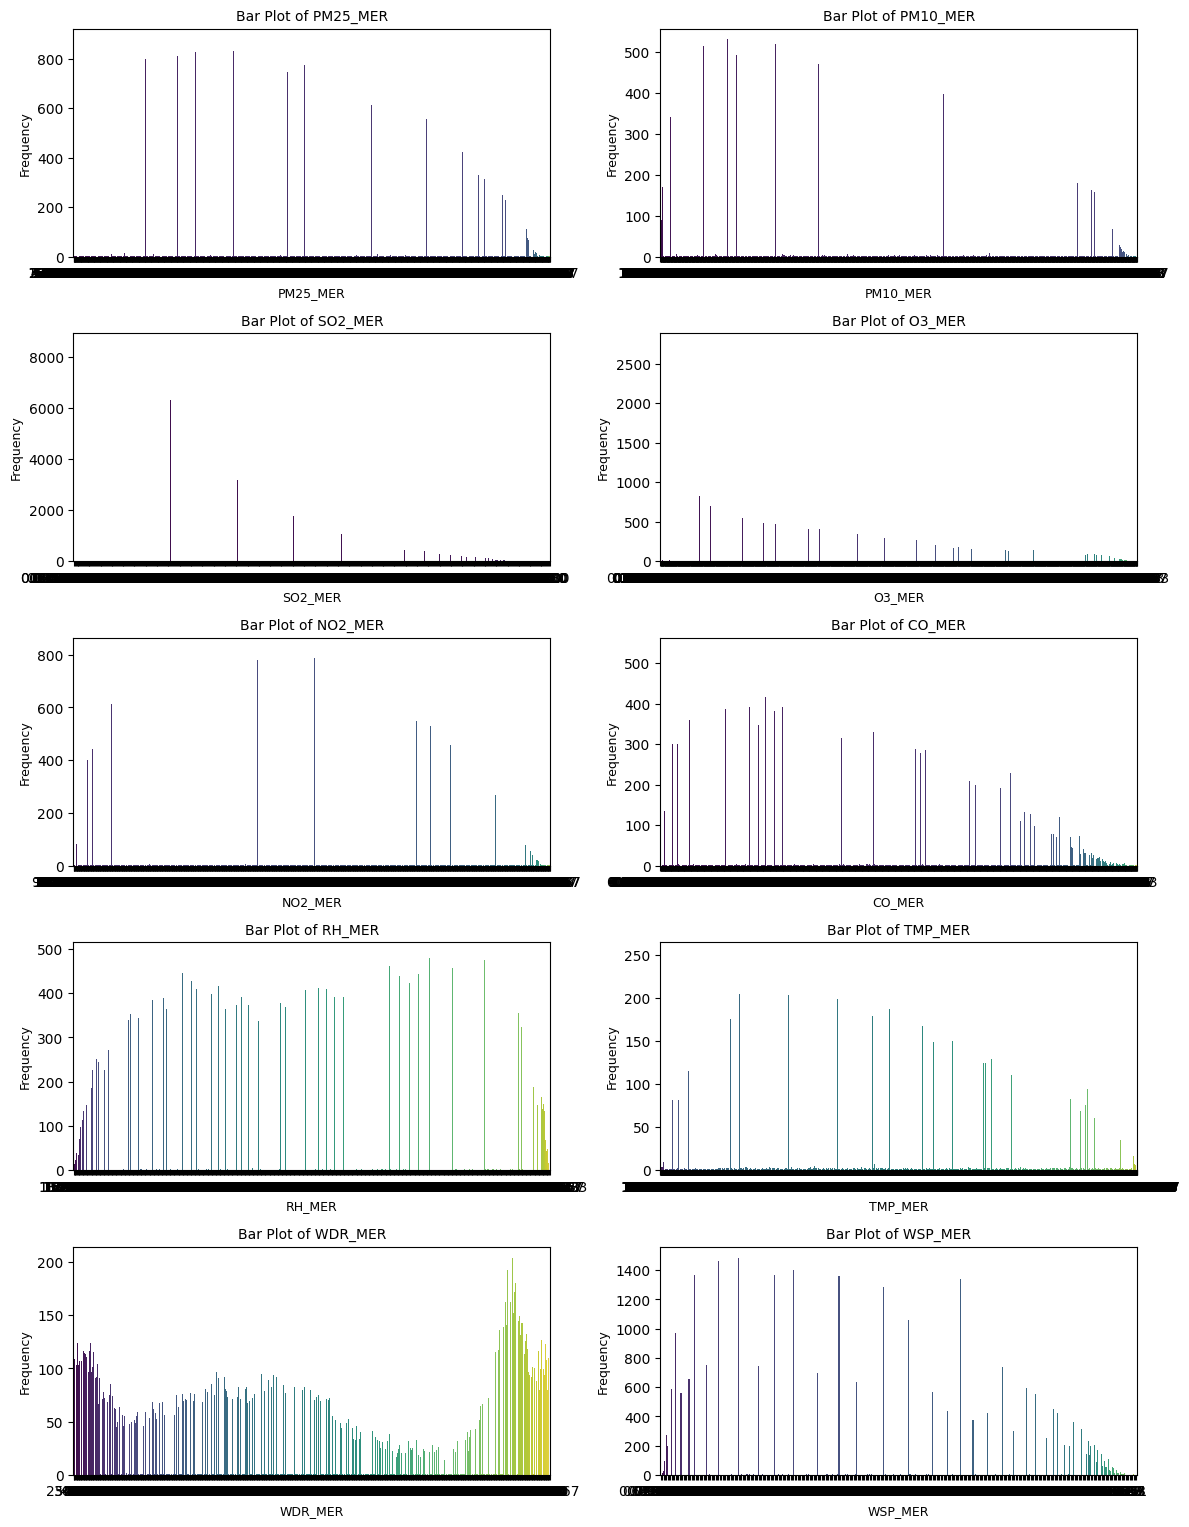

In [20]:

# Set up a figure with subplots
fig, axes = plt.subplots(6, 2, figsize=(12, 18))  # 6 rows, 2 columns grid
axes = axes.flatten()  # Flatten the 2D array of axes for easy iteration

# Loop through each column and corresponding subplot
for i, col in enumerate(columns_to_plot):
    sns.barplot(
        x=df[col].value_counts().index,
        y=df[col].value_counts().values,
        ax=axes[i],
        hue=df[col].value_counts().index,  # Assigning `x` variable to `hue`
        palette="viridis",
        legend=False
    )
    axes[i].set_title(f'Bar Plot of {col}', fontsize=10)
    axes[i].set_xlabel(col, fontsize=9)
    axes[i].set_ylabel('Frequency', fontsize=9)

# Remove any unused subplots if the number of columns is less than grid spaces
for j in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

##### Explanation and Analysis
**1. PM25_MER (Particulate Matter 2.5)**
- The histogram is right-skewed, with most values concentrated in the lower range.
- The majority of PM2.5 values are below 50, with the highest frequency around 10-30.
- Outliers are present at these higher levels, indicating infrequent but significant spikes in pollution.
- A long tail extends to higher PM2.5 levels, reaching up to 175.
- PM2.5 values range from 0 to 175.
- This distribution suggests that while typical PM2.5 levels are moderate, occasional pollution events lead to extreme levels.
- The high right skew might indicate that severe pollution events are rare but impactful.

**2. PM10_MER (Particulate Matter 10)**
- The histogram for PM10_MER is right-skewed, indicating that most values are concentrated in the lower range, with fewer occurrences at higher levels.
- The majority of PM10 values are below 100, with the peak frequency around 30-50.
- The distribution shows a long tail extending up to 400, suggesting occasional extreme pollution events. These spikes are particularly concerning, as high PM10 levels can pose an acute health risk to the general population, especially vulnerable groups such as children, the elderly, and individuals with pre-existing respiratory conditions.
- Outliers are visible at the higher levels, likely corresponding to these severe pollution episodes.
- The PM10 values range from 0 to 400.
- This distribution reflects frequent moderate pollution levels around 30-50 with some sporadic severe spikes.

**3. SO2_MER (Sulfur Dioxide)**
- The histogram is strongly right-skewed, with the majority of values concentrated near 0.
- Most SO2 levels are minimal or negligible, reflecting very low sulfur dioxide pollution under normal conditions.
- A long tail extends to 250, indicating occasional extreme pollution events.
- Outliers are observed at the higher levels, suggesting rare but significant spikes in sulfur dioxide emissions.
- SO2 values range from 0 to 250.
- This distribution suggests that sulfur dioxide levels are typically low, but occasional events lead to higher concentrations. These spikes could pose health risks, particularly for sensitive groups.

**4. O3_MER (Ozone)**
- The histogram is right-skewed, as most values concentrated in the lower range.
- The majority of O3 levels are below 50, with the highest frequency occurring near 0-10.
- The values range from 0 to 160, with a gradual decline in frequency as the values increase.
- A long tail is present, indicating occasional peaks in ozone concentration at higher levels (above 100).
- The distribution suggests that typical ozone levels remain low to moderate, but occasional spikes in concentration occur. These spikes are likely associated with strong sunlight and photochemical reactions.

**5. NO2_MER (Nitrogen Dioxide)**
- The histogram is slightly right-skewed, with the majority of values concentrated in the lower range.
- Most NO2 levels are below 50, with a peak around 20-30.
- Outliers are present at higher levels and a long tail is visible, with occasional spikes up to 120.
- The values range from 0 to 120.
- The distribution suggests that typical NO2 levels are moderate, with occasional elevated levels likely due to increased urban activities.

**6. CO_MER (Carbon Monoxide)**
- The histogram is right-skewed, with most values concentrated in the lower range.
- CO levels are predominantly below 1, with the highest frequency around 0.3-0.5.
- Outliers are observed in the higher range (above 2), which may correspond to localized emission events.
- The values range from 0 to 3.5, with a long tail indicating occasional higher levels.
- The distribution reflects low baseline levels of CO, indicative of relatively good air quality under typical conditions. However, outliers suggest sporadic increases in CO emissions, potentially from specific sources or events.

**7. RH_MER(Relative Humidity)**
- The histogram appears multimodal, with distinct peaks observed at approximately 30, 50, and 70 relative humidity. These peaks indicate different common atmospheric conditions in the data.
- Most RH values fall within the range of 20 to 80, showing significant variability in humidity levels.
- The range is from 0 to 100.
- The peaks at 30 and 70 likely correspond to dry and humid conditions, respectively, indicating seasonal or diurnal patterns in humidity.

**8. TMP_MER (Temperature)**
- The distribution is bell-shaped, resembling a normal distribution.
- Most temperatures are concentrated around 20, indicating this is the most frequent or typical value.
- The values range approximately from 6 to 32, showing the temperature variability.
- The normal-like distribution suggests that the temperature follows a typical climatic pattern, with outliers being rare.

**9. WDR_MER (Wind Direction)**
- The histogram is multimodal, indicating that wind directions cluster around several distinct angles.
- The values span from 0 to 360, representing all possible wind directions.
- Prominent peaks are observed around 50, 150, and 310, suggesting dominant prevailing wind directions during the observed period.
- These peaks reflect the directions from which the wind most commonly originates, which may correlate with local geography, weather patterns, or seasonal influences.

**10. WSP_MER (Wind Speed)**
- The histogram is right-skewed, indicating that most wind speeds are low, but some occasional higher speeds create a long tail.
- The majority of wind speeds are concentrated below 2, with a gradual decrease in frequency as wind speed increases.
- A few wind speeds reach up to 8, representing stronger, less frequent wind events.
- The values range from 0 to 8.
- The distribution suggests generally calm to moderate wind conditions, with sporadic occurrences of higher wind speeds.